# DeepArt Scoring

In the following notebook we make use of the deployed ResNet50 CNN model to predict the artist based on his artwork.
For that we need to retrieve the URL of the .jpg image to be scored and the notebook will score via the WML API the image.

In [1]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
from keras.backend import resize_images
from PIL import Image
from watson_machine_learning_client import WatsonMachineLearningAPIClient
import urllib3, requests, json


import requests
from io import BytesIO

Using TensorFlow backend.


In [7]:
# The code was removed by Watson Studio for sharing.

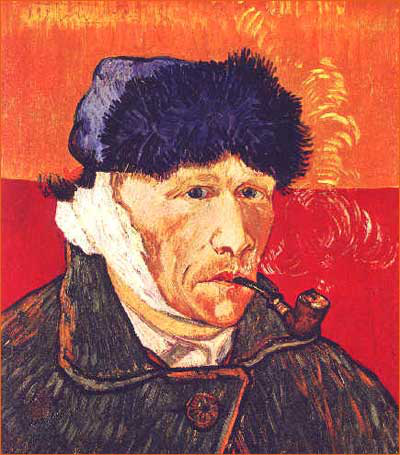

In [8]:
# Introduce artwork URL here
# For continuous iterations of images, please start from this cell on.

url="http://1.bp.blogspot.com/-iTZPWHN8GEE/TaQb8e9A2EI/AAAAAAAAAec/5XxWHGkQs6Y/s1600/oreille_vangogh.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [9]:
# Resizing and normalizing image


img_r=img.resize((224,224), Image.ANTIALIAS)
arr = np.array(img_r)
arr=arr/255
arr_list=arr.tolist()
arr.shape

(224, 224, 3)

In [10]:
# NOTE: generate iam_token and retrieve ml_instance_id based on provided documentation	
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + iam_token, 'ML-Instance-ID': ml_instance_id}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"fields": [], "values": [arr_list]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/v3/wml_instances/0d0d0d43-7e2a-4bcd-95ce-223a71601a97/deployments/531c0eee-105b-4670-805e-a8f0210aedba/online', json=payload_scoring, headers=header)
score=json.loads(response_scoring.text)

labels=["Alfred Sisley","Edgar Degas","Francisco Goya","Pablo Picasso","Paul Gauguin","Pierre-Auguste Renoir","Rembrandt","Tiziano","Vincent van Gogh"]

arg=np.argmax(score["values"][0])
amax=np.amax(score["values"][0])
L=np.argsort(score["values"][0])

Predicted Artist:  Vincent van Gogh
Associated probability:  100.0 %
2nd predicted Artist:  Tiziano
2nd associated probability:  0.0 %


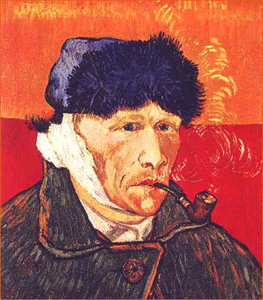

In [11]:
print("Predicted Artist: ",labels[arg])
print("Associated probability: ",round(amax,2)*100,"%")

print("2nd predicted Artist: ",labels[L[-2]])
print("2nd associated probability: ",round(score["values"][0][L[-2]],2)*100,"%")

img.thumbnail((300,300),Image.ANTIALIAS)
img

In [ ]:
1+1